In [ ]:
%run Exp_analysis.ipynb

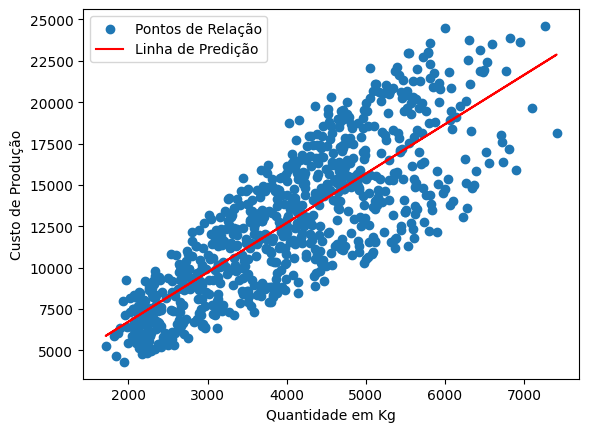

In [4]:
from sklearn import linear_model
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

Y = data_frame2['Custo_de_producao_reais']
X = data_frame2[['Quantidade_Produzida_kg']]

modelo = LinearRegression()
modelo.fit(X,Y)

a_coeff = modelo.coef_
l_coeff = modelo.intercept_

plt.scatter(X,Y, label = "Pontos de Relação")
plt.plot(X, a_coeff*X + l_coeff , color='red', label ="Linha de Predição")

plt.xlabel("Quantidade em Kg")  
plt.ylabel("Custo de Produção")    

plt.legend()
plt.show()